## Import libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Dataset

In [2]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("customer.csv");

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


## Scatter Plot

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

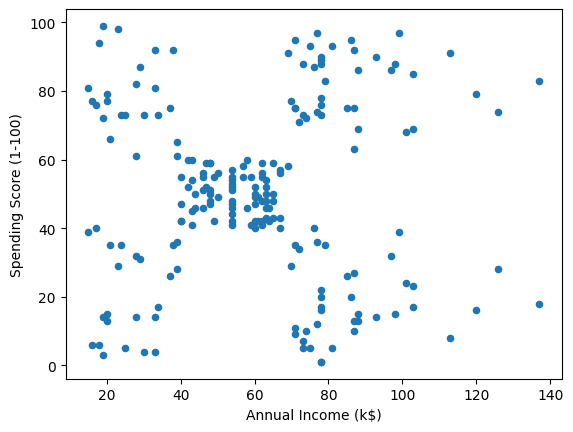

In [4]:
df.plot.scatter('Annual Income (k$)','Spending Score (1-100)')

## Kmeans model

In [7]:
kmeans = KMeans(n_clusters=3, max_iter=100)

In [8]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [9]:
kmeans.fit(X)

KMeans(max_iter=100, n_clusters=3)

In [10]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

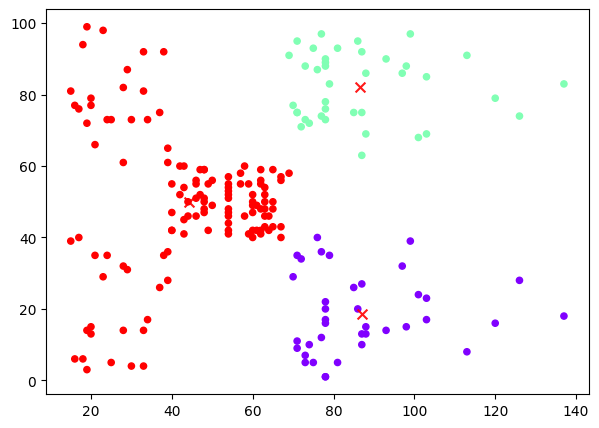

In [10]:
plt.figure(figsize=(7, 5))
plt.scatter(df[['Annual Income (k$)']], df[['Spending Score (1-100)']], c=kmeans.labels_, s=20, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
marker='x', c='r', s=50, alpha=0.9)
plt.show()

In [12]:
kmeans.cluster_centers_

array([[87.        , 18.63157895],
       [86.53846154, 82.12820513],
       [44.15447154, 49.82926829]])

In [14]:
clusters = pd.DataFrame(kmeans.cluster_centers_, columns=['Annual Income (k$)', 'Spending Score (1-100)'], index =['Cluster1', 'Cluster2', 'Cluster3'])

In [15]:
clusters

,Annual Income (k$),Spending Score (1-100)
Cluster1,87.000000,18.631579
Cluster2,86.538462,82.128205
Cluster3,44.154472,49.829268


## Elbow Method

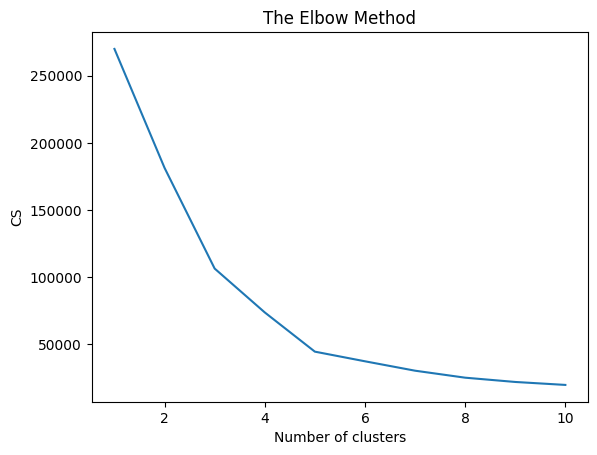

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

## Silhouette Method

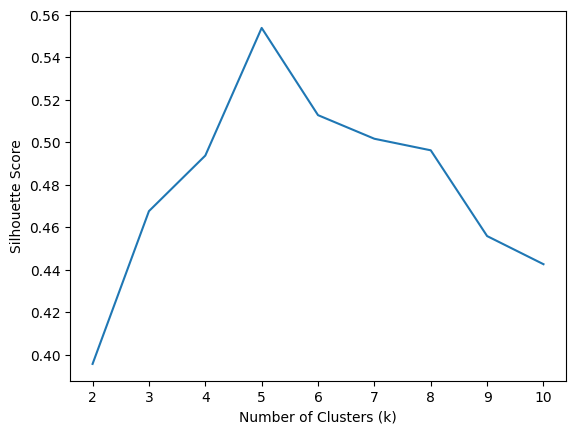

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2, 11):  # Test cluster numbers from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
# Plot the silhouette scores to find the optimal k
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

## University data

In [16]:
university_data = pd.read_csv("Universities.csv")

In [21]:
university_data

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


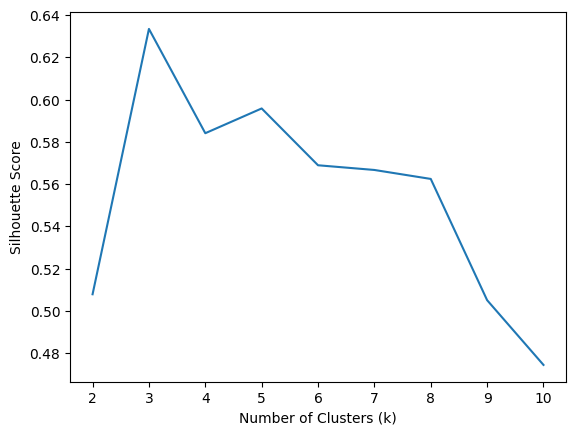

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
silhouette_scores = []
X =  university_data.iloc[:, 1:7]
for k in range(2, 11):  # Test cluster numbers from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
# Plot the silhouette scores to find the optimal k
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

In [23]:
kmeans_model = KMeans(n_clusters = 3)

In [24]:
kmeans_model.fit(university_data.iloc[:,1:7])

KMeans(n_clusters=3)

In [25]:
kmeans_model.labels_

array([2, 1, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0,
       2, 2, 0], dtype=int32)

In [26]:
kmeans_model.cluster_centers_

array([[1.32916667e+03, 8.48333333e+01, 2.98333333e+01, 1.08333333e+01,
        3.32372500e+04, 9.06666667e+01],
       [1.36000000e+03, 8.75000000e+01, 3.45000000e+01, 6.50000000e+00,
        6.11330000e+04, 8.40000000e+01],
       [1.18100000e+03, 6.53636364e+01, 5.02727273e+01, 1.59090909e+01,
        1.48715455e+04, 8.29090909e+01]])

In [27]:
clusters=pd.DataFrame(kmeans_model.labels_,columns=['cluster'])
clusters

,cluster
0,2
1,1
2,0
3,0
4,2
5,0
6,0
7,2
8,0
9,1


In [28]:
pd.concat([university_data,clusters],axis=1)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,1
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,1
